<a href="https://colab.research.google.com/github/deepakk177/ML---Lab-Programs-MTech-AI-2025-/blob/main/Machine_Learning_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab 6 : K-Means Clustering**
**Name :** Deepak Singh Porte

**Scholar Number :** 25215011122


Question 1: Perform k-means clustering on the given dataset for k values ranging from 2 to 12.
1. For each value of k, compute and record the average silhouette score.
2. Additionally, plot the silhouette distribution for k = 2, 4, and 8 to visualize how cluster quality varies.


K-Means Clustering Results:

k=2: Inertia = 874.2601
k=3: Inertia = 456.7121
k=4: Inertia = 402.3281
k=5: Inertia = 380.2050
k=6: Inertia = 335.0047
k=7: Inertia = 305.3144
k=8: Inertia = 285.6670
k=9: Inertia = 263.5615
k=10: Inertia = 263.2116
k=11: Inertia = 229.7923
k=12: Inertia = 224.1104


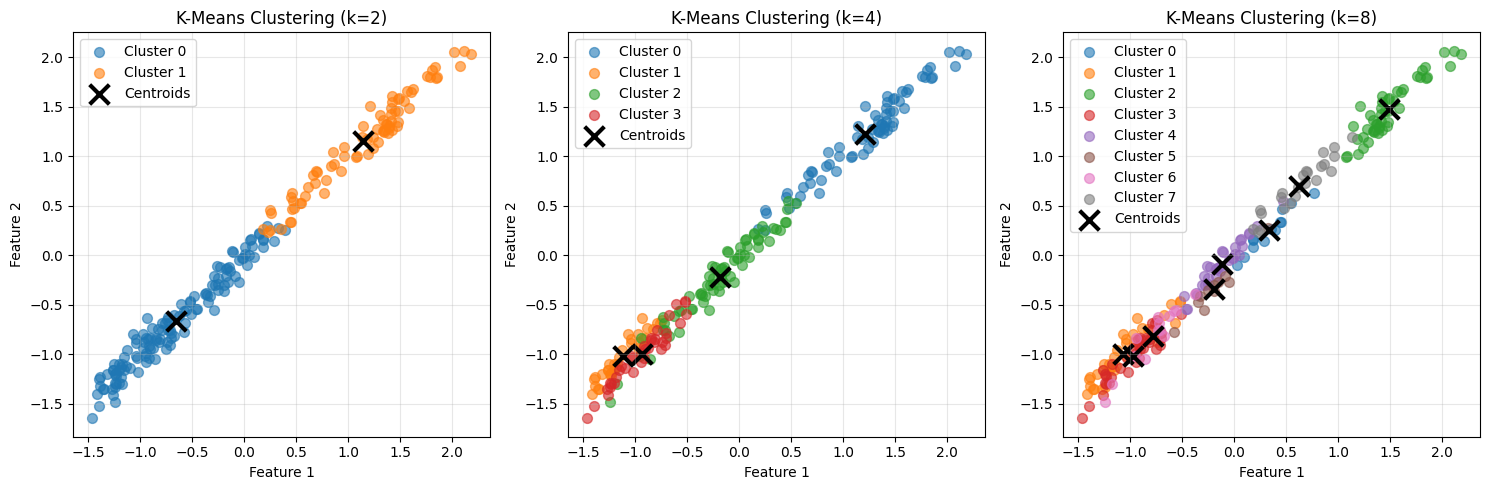

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and normalize dataset
df = pd.read_csv("/content/sample_data/Seed_Data.csv")
X = df.values
X = (X - X.mean(axis=0)) / X.std(axis=0)

def kmeans(X, k, max_iters=100):
    # Initialize centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        # Assign clusters
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Test different k values
print("K-Means Clustering Results:\n")
for k in range(2, 13):
    labels, centroids = kmeans(X, k)
    # Calculate inertia (within-cluster sum of squares)
    inertia = sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k))
    print(f"k={k}: Inertia = {inertia:.4f}")

# Visualize clustering for k=2, 4, 8
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [2, 4, 8]

for idx, k in enumerate(k_values):
    labels, centroids = kmeans(X, k)

    # Plot first two features
    for i in range(k):
        axes[idx].scatter(X[labels == i, 0], X[labels == i, 1],
                         alpha=0.6, s=50, label=f'Cluster {i}')
    axes[idx].scatter(centroids[:, 0], centroids[:, 1],
                     c='black', marker='x', s=200, linewidth=3, label='Centroids')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].set_title(f'K-Means Clustering (k={k})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Question 2: Elbow

Apply k-means clustering for k values from 1 to 12.
For each k, calculate the within-cluster sum of squares (WCSS) and plot the elbow curve.

k=1: WCSS = 800.0000
k=2: WCSS = 515.6689
k=3: WCSS = 410.0110
k=4: WCSS = 259.7059
k=5: WCSS = 213.7985
k=6: WCSS = 189.8336
k=7: WCSS = 151.3792
k=8: WCSS = 131.6666
k=9: WCSS = 124.2827
k=10: WCSS = 120.7379
k=11: WCSS = 108.2085
k=12: WCSS = 96.0427


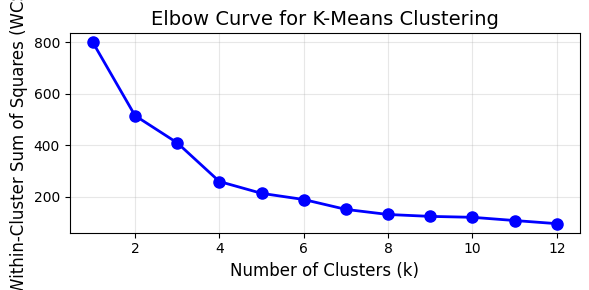

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/sample_data/Mall_Customers_2.csv.xls")

# Select only numeric columns
X = df.select_dtypes(include=[np.number]).values

# Normalize data
X = (X - X.mean(axis=0)) / X.std(axis=0)

def kmeans(X, k, max_iters=100, tol=1e-4):
    """K-means clustering from scratch"""
    n_samples = X.shape[0]

    # Initialize centroids randomly
    idx = np.random.choice(n_samples, k, replace=False)
    centroids = X[idx].copy()

    for _ in range(max_iters):
        # Assign clusters
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.abs(new_centroids - centroids).max() < tol:
            break
        centroids = new_centroids

    return labels, centroids

# Question 2: Elbow Method - WCSS for k=1 to 12
wcss_scores = {}

for k in range(1, 13):
    if k == 1:
        # For k=1, all points belong to one cluster, centroid is the mean
        centroid = X.mean(axis=0)
        wcss = np.sum((X - centroid) ** 2)
    else:
        labels, centroids = kmeans(X, k)
        # Calculate WCSS
        wcss = sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k))

    wcss_scores[k] = wcss
    print(f"k={k}: WCSS = {wcss:.4f}")

# Plot Elbow Curve
plt.figure(figsize=(6, 3))
plt.plot(list(wcss_scores.keys()), list(wcss_scores.values()), 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Curve for K-Means Clustering', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()